# Landmark Detection for SEM Images (.tif files)

In [202]:
from PIL import Image
import numpy as np
from skimage import data
from skimage.feature import match_template
import matplotlib.pyplot as plt
import tifffile as tiff

In [203]:
main_image = np.array(Image.open('../tif_data/7_2/2_42.tif'))
cross_tif = np.array(Image.open('000_cross_marker.tif'))
q1_L_tif = np.array(Image.open('../tif_data/7_2/2_42.tif'))
q2_L_tif = np.array(Image.open('../tif_data/7_2/2_42.tif'))
q3_L_tif = np.array(Image.open('../tif_data/7_2/2_42.tif'))
q4_L_tif = np.array(Image.open('../tif_data/7_2/2_42.tif'))[100:350, 600:900]

landmark_dict = {
    'cross':cross_tif,
    'q1_L':q1_L_tif,
    'q2_L':q1_L_tif,
    'q3_L':q1_L_tif,
    'q4_L':q1_L_tif,
}

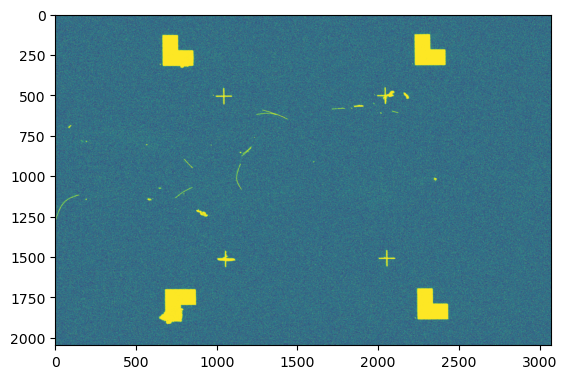

In [204]:
plt.imshow(main_image)

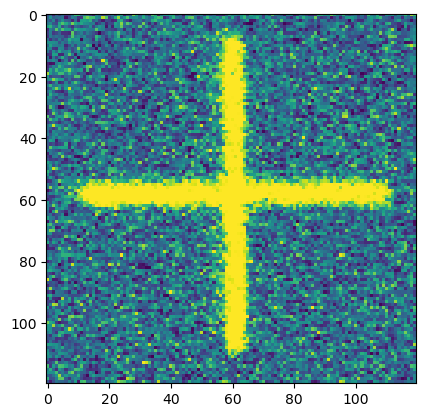

In [205]:
plt.imshow(cross_tif)

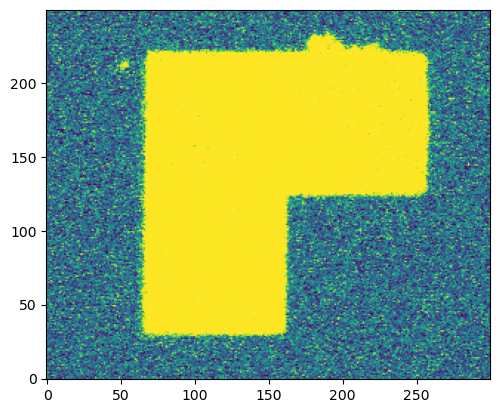

In [206]:
plt.imshow(q4_L_tif, origin='lower')

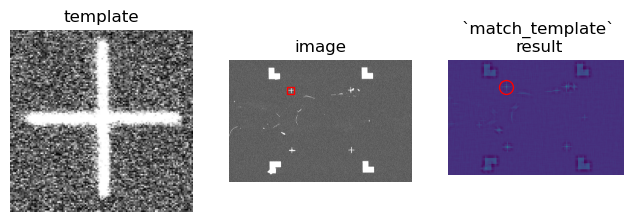

In [207]:
result = match_template(main_image, cross_tif)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1] #reverse the ordered pair

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(cross_tif, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(main_image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
h_cross, w_cross = cross_tif.shape
rect = plt.Rectangle((x, y), h_cross, w_cross, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

393 529


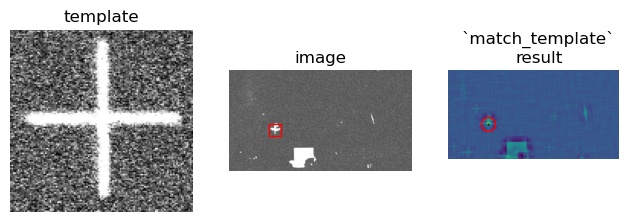

In [208]:
im = np.array(Image.open('../tif_data/7_2/2_34.tif'))
new_image = im[1000:2000, 1200:3000]

result = match_template(new_image, cross_tif)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1] #reverse the ordered pair

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(cross_tif, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(new_image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
h_cross, w_cross = cross_tif.shape
rect = plt.Rectangle((x, y), h_cross, w_cross, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)
print(x,y)
ax3.scatter(393, 529, s=0.2, c='black')
plt.show()


# Define the function to get coordinates of each cross marker: 

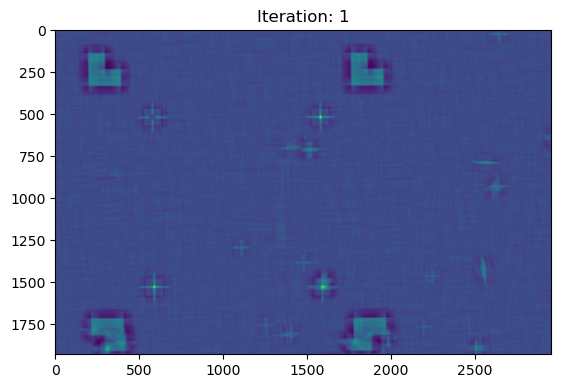

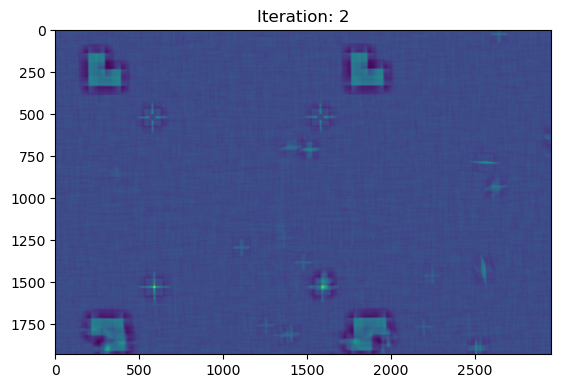

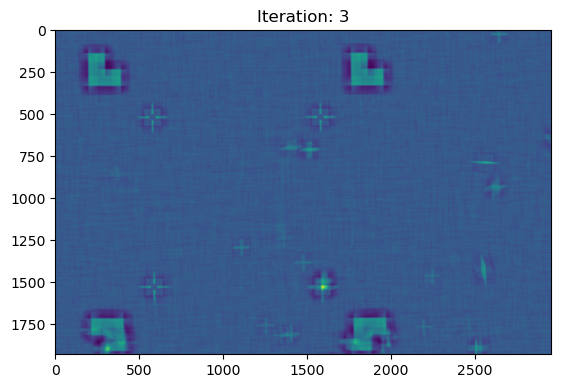

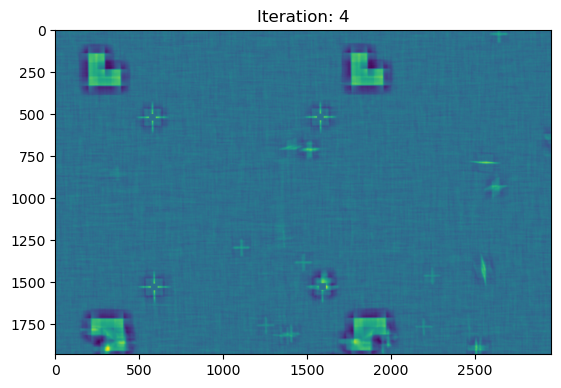

[[ 640  584]
 [1640  582]
 [ 651 1591]
 [1653 1589]]


In [209]:
def get_cross_coordinates(image:np.array, marker:np.array, instances:int) -> tuple[np.array, np.array]:
    coordinate_array = []
    result = match_template(image, marker)
    #grab the first 4 largest results in the result heat map
    for i in range(0,instances):
        ij = np.unravel_index(np.argmax(result), result.shape)
        x, y = ij[::-1] #row major to cartesian, cordinates of a corner of the template, we want the center
        y_centered = y + marker.shape[0] // 2
        x_centered = x + marker.shape[1] // 2
        coordinate_array.append((int(x_centered),int(y_centered)))
        result[y-20:y+20, x-20:x+20] = 0 #remove max value from the image (we might need to remove the region)
        test_plot(result, i)
    #add geometric tests here...
    if len(coordinate_array) == instances:
        return (np.array(coordinate_array), result)
    else:
        print("Cordinates not located")
        return
        
def test_plot(result,i):
    plt.imshow(result)
    plt.title(f"Iteration: {i+1}")
    plt.show()
    cont = input("cont: ")
        
coords, result = get_cross_coordinates(im, cross_tif, 4)
print(coords)

# Plot points from the coordinate pairs returned from get_cross_coordinates()

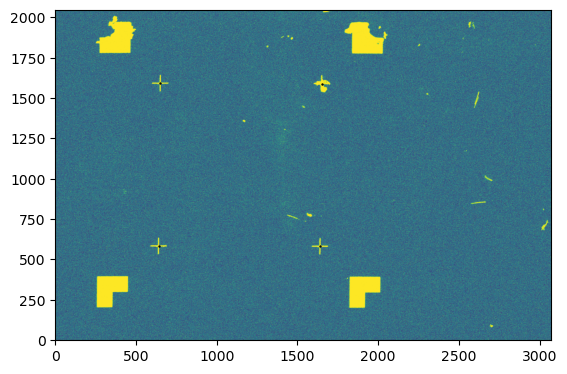

In [210]:
def plot_coords(image:np.array, coords:np.array):
    plt.imshow(image, origin='lower')
    for i in range(0,len(coords)):
        plt.scatter(coords[i][0], coords[i][1], s=0.5, c='black')
    plt.show()

plot_coords(im, coords)

# Test with some 'bad' cross markers:

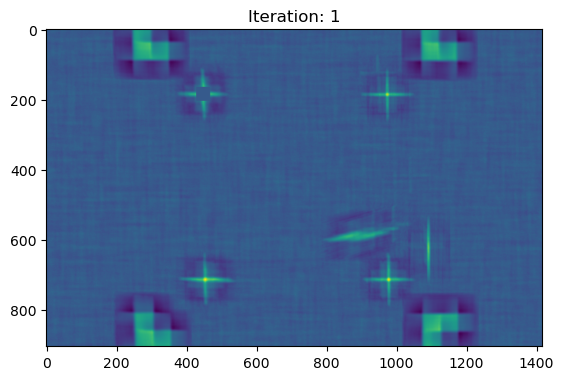

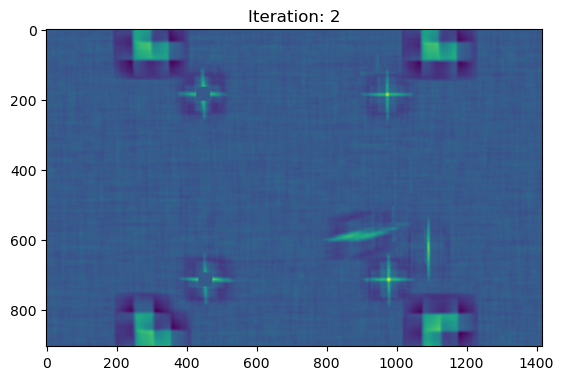

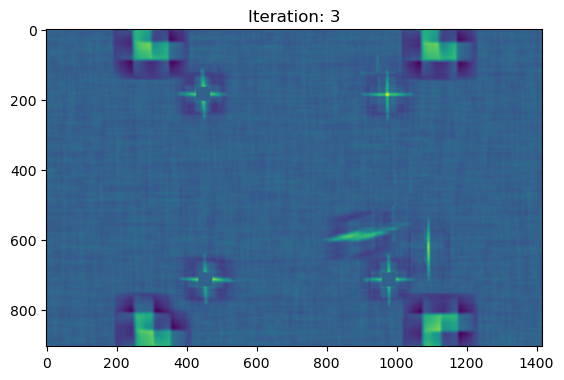

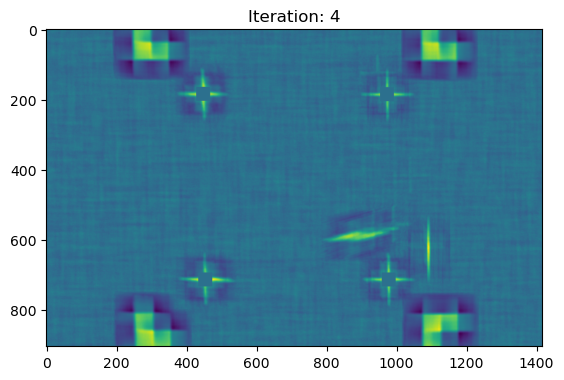

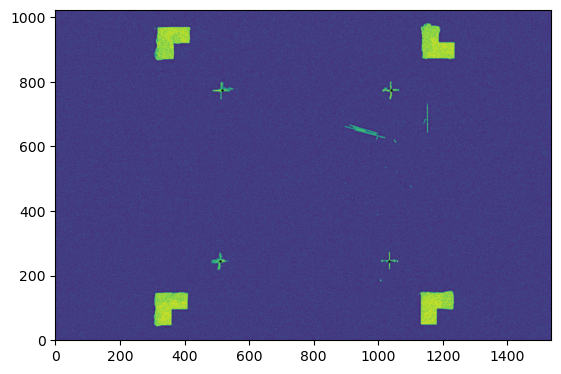

In [211]:
im2 = np.array(Image.open('../tif_data/4_6/2_24.tif'))

coords2, result = get_cross_coordinates(im2, cross_tif, 4)
plot_coords(im2, coords2)

In [212]:
tiff.imwrite('000_cross_marker.tif', cross_tif)